In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
df_tesla=pdr.get_data_yahoo('TSLA')
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


##  Simple Moving average

- Rolling


<AxesSubplot:xlabel='Date'>

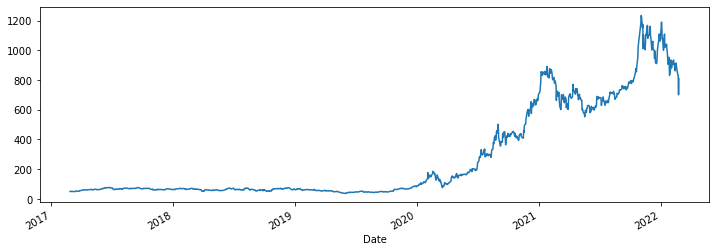

In [3]:
df_tesla['Open'].plot(figsize=(12,4))

In [4]:
df_tesla['Open: 10 days rolling']= df_tesla['Open'].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

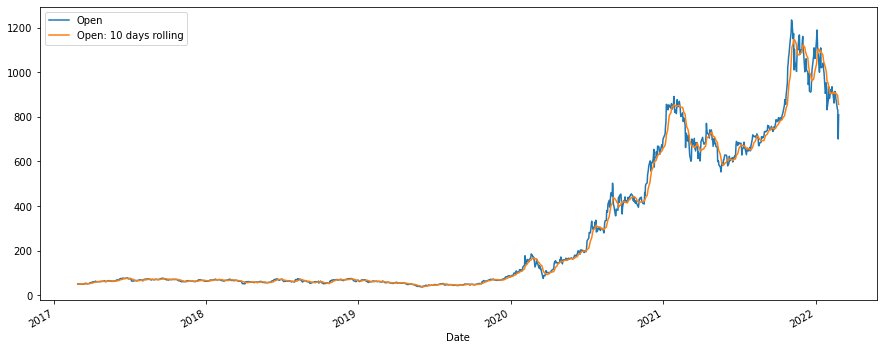

In [5]:
df_tesla[['Open','Open: 10 days rolling']].plot(figsize=(15,6))

In [6]:
df_tesla['Open: 30 days rolling']= df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla['Open: 50 days rolling']= df_tesla['Open'].rolling(window=50, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

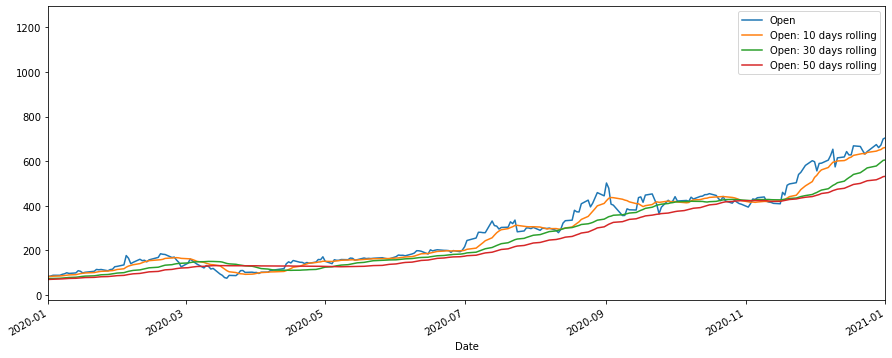

In [8]:
df_tesla[['Open','Open: 10 days rolling','Open: 30 days rolling','Open: 50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

## Cummulative average

<AxesSubplot:xlabel='Date'>

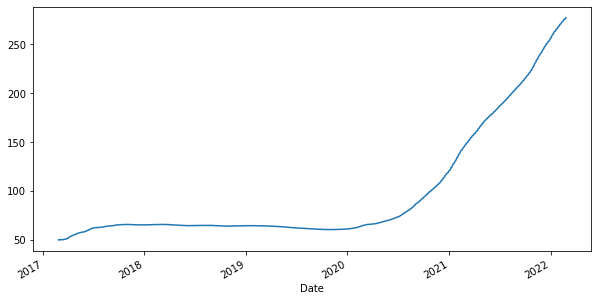

In [9]:
# Expanding function we use to find cummulitive average
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

## Expotential weighted moving average

In [10]:
# Alpha-- smoothing factor
# ewm-- exponetial weighted moving

df_tesla['EMA_0.1']= df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

In [13]:
# Alpha-- smoothing factor
df_tesla['EMA_0.3']= df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

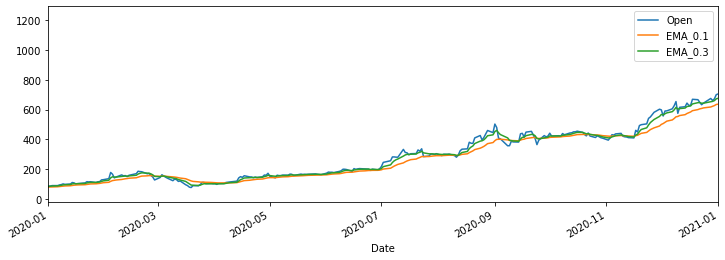

In [14]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,4))

In [15]:
# Span -- No of decay
# Aplha = (2/(span+1))
df_tesla['EMA_5Days']=df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

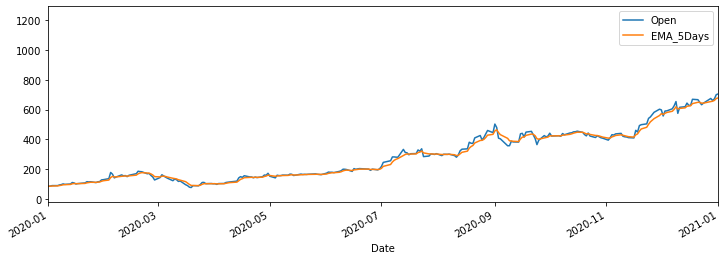

In [16]:
df_tesla[['Open','EMA_5Days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,4))